# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 23-95% R로 분석 다시보기-4-연속형변수 관계-1 (58일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 연속형 변수의 관계 찾기

## 과연 아빠의 키는 아들 키에 얼마나 큰 영향을 줄까?

예전에 피어슨 통계학자가 아빠키와 아들키의 관계에 관심을 가지고 1978쌍의 키 데이터를 모았습니다. 이제 이것을 가지고 분석하고자 합니다.

먼저 read.csv() 함수로 데이터를 불러오기로 합니다.

In [1]:
# 파일 읽기
heights <- read.csv("Practice/data/heights.csv")

In [2]:
# 읽은 파일 확인
head(heights)

father,son
165.2,151.8
160.7,160.6
165.0,160.9
167.0,159.5
155.3,163.3
160.1,163.2


In [3]:
# 전체 라인수 확인
dim(heights)

[1] 1078    2

이 데이터는 각각 아빠 키, 아들키 를 의미하는 두개의 변수 father, son 이 있고, 첫번째 관측치에서는 아빠키는 165.2 cm, 아들은 151.8 cm 입니다. 이런식으로 모두 1708개의 아빠키, 아들키 쌍으로 정리 되어 있습니다.  

원래 R 에 있는 데이터는 father.son 이라는 이름으로 되어 있습니다. 원래 데이터 내용을 보면

In [6]:
library(UsingR)
data(father.son)

Loading required package: MASS
Loading required package: HistData
Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units


Attaching package: ‘UsingR’

The following object is masked from ‘package:survival’:

    cancer



In [7]:
data(father.son)

In [8]:
head(father.son)

fheight,sheight
65.04851,59.77827
63.25094,63.21404
64.95532,63.34242
65.75250,62.79238
61.13723,64.28113
63.02254,64.24221


책에서 제공된 데이터는 father.son 이 inch 로 되어 있는 것을 cm로 변환한 것입니다. 데이터를 로드 하지 않고 cm() 함수를 이용 해서 작업해도 됩니다.
아래 데이터는 파일 heights.csv 파일을 읽은것 하고 같은 값입니다.

In [12]:
head(round(cm(father.son),1))

fheight,sheight
165.2,151.8
160.7,160.6
165.0,160.9
167.0,159.5
155.3,163.3
160.1,163.2


분석하기 전에 데이터의 요약을 살펴 보기위해서 summary() 함수를 이용합니다.

In [13]:
# summary() 함수 call
summary(heights)

     father           son       
 Min.   :149.9   Min.   :148.6  
 1st Qu.:167.1   1st Qu.:170.0  
 Median :172.1   Median :174.3  
 Mean   :171.9   Mean   :174.5  
 3rd Qu.:176.8   3rd Qu.:179.0  
 Max.   :191.6   Max.   :199.0  

summary() 함수를 부르면, 아빠키와 아들키 각각을 다섯숫자 요약으로 보여줍니다. 아빠키인 경우 최소 149.9, 최대 191.6 cm 이고 아들키는 148.6cm 에서 199.0 cm 까지 붙포되어 있습니다. 

이번에는 상자그림을 살펴보면 다섯자리 숫자가 더 잘 이해될 것입니다.

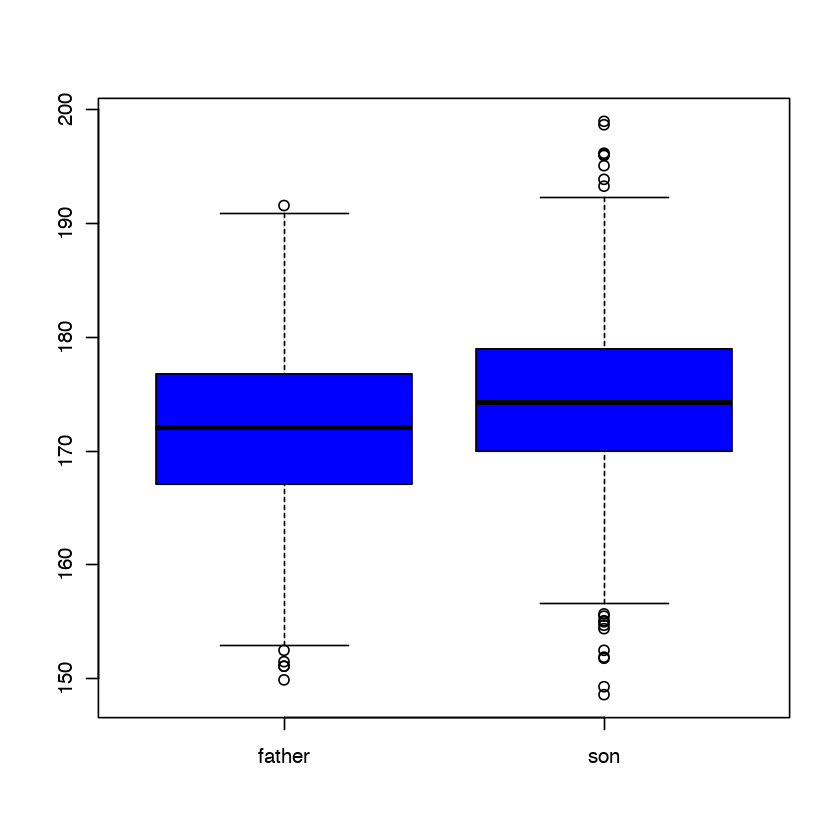

In [15]:
# 상자그림
boxplot(heights, col="blue")

아들키 상자그림이 아빠키 상자그림보다 조금 더 높이 걸려 있습니다. 세대가 지나면서 전반적으로 키가 더 커진것을 알 수 있을 것 같습니다. 중앙값도 커졌고, 평균도 높아 졌습니다.  

두 상장 그림에서 이런 것을 비교 할 수 있습니다.  

아빠키와 아들키 모두 중간 50% 구간 간격은 좁고 위아래 구간의 간격은 넓은것으로 보입니다. 

아빠키를 기준으로 아들키의 분포를 상자그림으로 표시 할 수 있습니다.

In [16]:
# 아빠키 설정
x <- heights$father

# 아들키 설정
y <- heights$son

# 아빠키 별로 아들키 구룹화
groups<- split(y, round(x))

In [19]:
head(groups, 10)

$`150`
[1] 165.7

$`151`
[1] 164.6 162.4

$`152`
[1] 171 165

$`153`
[1] 166.8

$`154`
[1] 154.4 158.2

$`155`
[1] 163.3 165.0 169.7 175.5 166.4 172.6

$`156`
[1] 172 169

$`157`
[1] 161.9 165.6 160.7 171.6

$`158`
[1] 170.8 159.5 167.2 172.0 162.4 167.5 162.1 171.2 164.7

$`159`
 [1] 169.1 155.7 162.6 167.1 169.9 176.2 171.5 165.7 160.3 174.4

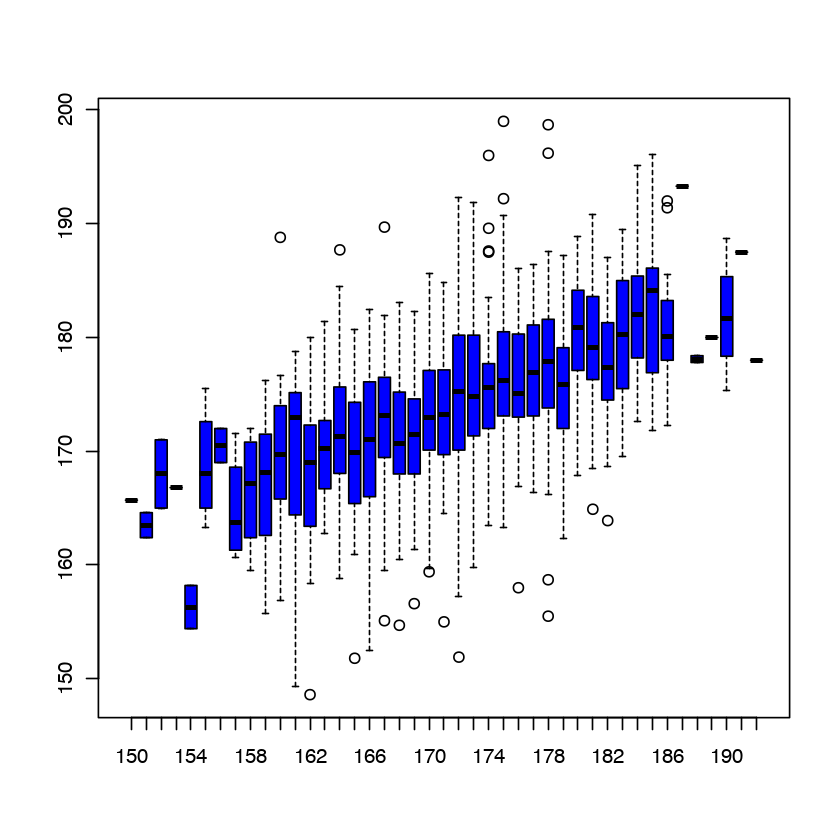

In [20]:
boxplot(groups, col="blue")

가로축이 아빠키 분류 이고 세로축이 아들키 분류 입니다. 각 아빠 키별로 아들키의 상자그림을 볼수 있습니다.

이제 아빠키 아들키 의 분포를 볼 수 있습니다.

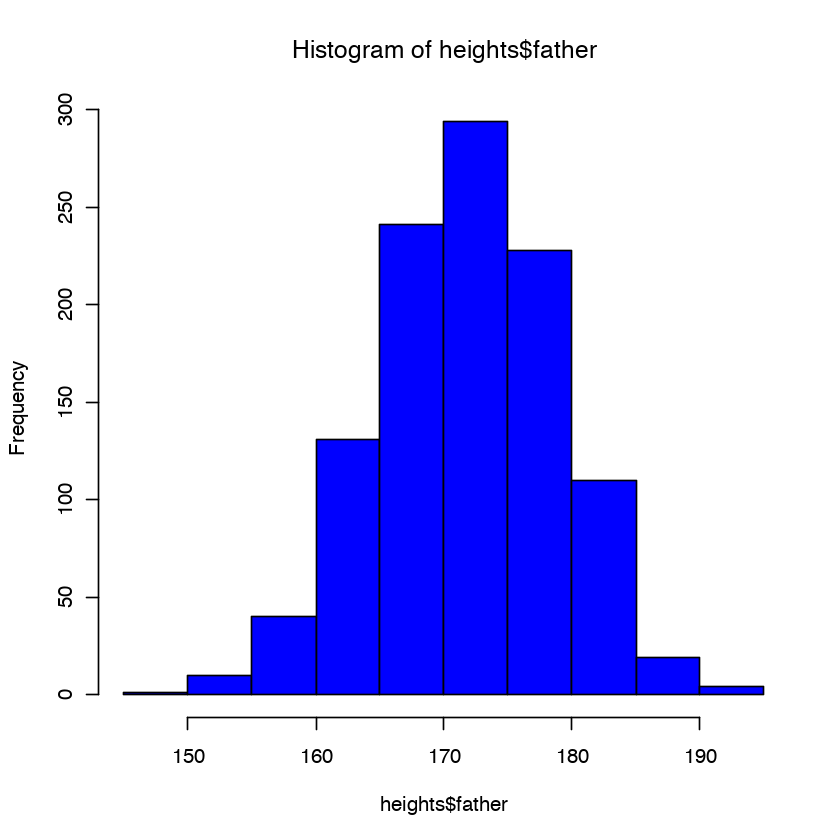

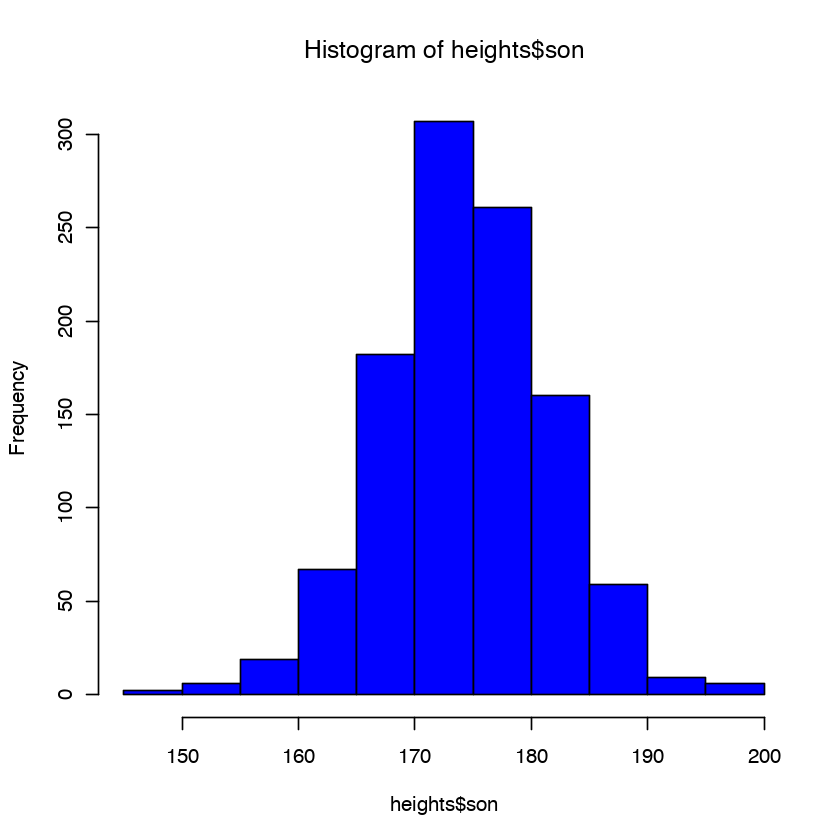

In [23]:
# 윈도우를 2개로 분리
hist(heights$father, col="blue")
hist(heights$son, col="blue")

아들키, 아빠키 모두 중앙값 큰처에서 좌우 대칭 분포 형태를 보입니다. 각 세로축은 아들수 또는 아빠 수를 나타내고, 가로축은 아빠키, 또는 아들키를 나타냅니다.

다음에는 산점도및 선형회귀분석에 대해서 정리할 예정입니다.